## ВШЭ, ФКН, Программа "Специалист по DS", Курс "Прикладная статистика для ML"
### ДЗ №2: Критерии однородности
    
#### *Выполнил: Кирилл Н., 15.12.2021 г.*

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot,qqplot_2samples
from statsmodels.stats.descriptivestats import sign_test

### Упражнение 1 (25 баллов).

В файле anorexia.txt записан вес пациентов до начала терапии анорексии и после ее окончания. Была ли терапия эффективна?

In [2]:
df_anor = pd.read_csv('HW2_Data/anorexia.txt', sep='\t', header=0, names=['Before', 'After'])
df_anor.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


In [3]:
df_anor.describe()

,Before,After
count,29.000000,29.000000
mean,82.689655,85.696552
std,4.845495,8.351924
min,70.000000,71.300000
25%,80.400000,81.900000
50%,82.600000,83.900000
75%,85.000000,90.900000
max,94.900000,103.600000


In [4]:
sample_before = df_anor['Before']
sample_after = df_anor['After']
sample_ba_diff = sample_before - sample_after

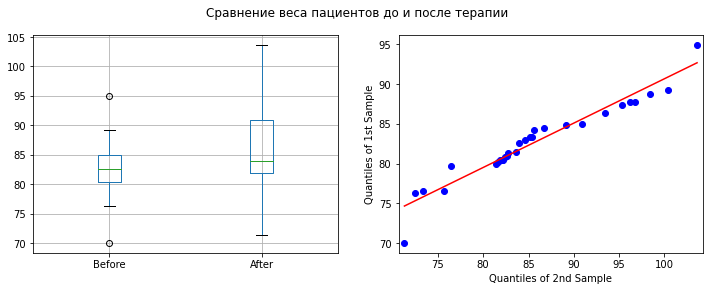

In [47]:
# Boxplot and qqplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4)) 

df_anor.boxplot(ax=ax1)
qqplot_2samples(sample_before, sample_after, line='r', ax=ax2)

plt.suptitle('Сравнение веса пациентов до и после терапии')
plt.show()

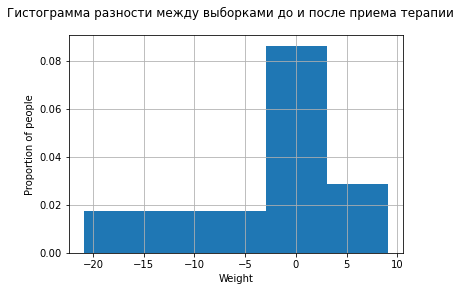

In [68]:
# Гистограммы
fig, ax = plt.subplots(ncols=1, figsize=(6,4)) 

plt.hist(sample_ba_diff, bins=5, density=True)
ax.set_xlabel("Weight")
ax.set_ylabel("Proportion of people")
ax.grid(True)

plt.suptitle('Гистограмма разности между выборками до и после приема терапии')
plt.show()

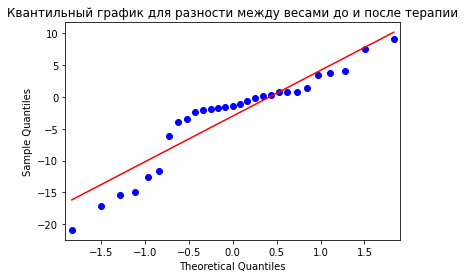

In [8]:
# Квантильный график
ax = plt.subplot()
plt.title('Квантильный график для разности между весами до и после терапии')
qqplot(sample_ba_diff, line='s', ax=ax)
plt.show()

In [9]:
print('Медиана разности наблюдений до и после терапии: {:.2f}'.format(np.median(sample_ba_diff)))

Медиана разности наблюдений до и после терапии: -1.40


<span style="color:blue">
Предварительные выводы: 
<li> Из приведенных данных и графиков следует, что вес после терапии вырос незначительно, 
т.е. лечение вряд ли было эффективным.</li>
<li> Распределение разности между выборками внешне далеко от нормального и симметричного.</li>
<li> Будем использовать критерии однородности для зависимых выборок.</li>
</span>

**1. Критерий знаков**

In [62]:
# Критерий знаков
sign_test(sample_ba_diff)

(-3.5, 0.26493089646101)

<span style="color:blue">
Вывод: двусторонний критерий знаков не отвергает нулевую гипотезу о равенстве нулю параметра сдвига.
</span>

**2. Критерий знаковых рангов Уилкоксона**

In [240]:
# Критерий знаковых рангов Уилкоксона
# The one-sided test has the null hypothesis that the median is negative against the alternative that it is positive
stats.wilcoxon(sample_before, sample_after, alternative='greater')

WilcoxonResult(statistic=131.5, pvalue=0.9685401386869866)

<span style="color:blue">
Вывод: односторонний критерий знаковых рангов Уилкоксона не отвергает нулевую гипотезу об отрицательности параметра сдвига 
до и после терапии при условии симметричности распределения остатков.
</span>

**3. Критерий Стьюдента ($t$-тест)**

In [242]:
# Проверка на нормальность с помощью критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера
pvalues = [stats.kstest(sample_ba_diff, stats.norm(*stats.norm.fit(sample_ba_diff)).cdf)[1],
            stats.shapiro(sample_ba_diff)[1],
            stats.jarque_bera(sample_ba_diff)[1]]

print('P-values для критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера:\n')
print(pvalues)

P-values для критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера:

[0.09437088443968988, 0.007945147342979908, 0.15358887634143104]


<span style="color:blue">
Вывод: cудя по графикам и критерию Шапиро-Уилка, предположение о нормальности не выполняется. 
В то же время критерии Колмогорова-Смирнова и Харке-Бера не отвергают эту гипотезу. 
Такой разброс может быть связан с небольшим объемом выборки. 
В любом случае, применим критерий Стьюдента.
</span>

In [243]:
# Критерий Стьюдента
stats.ttest_rel(sample_before, sample_after)

Ttest_relResult(statistic=-2.215587843931166, pvalue=0.03502259756218883)

<span style="color:blue">
Вывод: двусторонний критерий Стьюдента отвергает нулевую гипотезу о равенстве нулю параметра сдвига при уровне значимости 5%, 
однако условие нормальности вряд ли выполняется, как следует из сказанного выше. 
</span>

<span style="color:blue">
ИТОГОВЫЙ ВЫВОД: в целом, наиболее корректным в данном случае является применение критерия знаков и визуальный анализ
графиков, из которых следует, что гипотеза о равенстве нулю параметра сдвига не отвергается. 
Таким образом, эффект от данной терапии можно считать незначительным.
</span>

### Упражнение 2 (25 баллов).

В файле weights.txt записан вес пациентов мужского и женского пола. Есть ли значимые различия в весе мужчин и женщин?

In [11]:
df_weights = pd.read_csv('HW2_Data/weights.txt', sep='\t', header=0, names=['Group', 'Weight'])
df_weights

,Group,Weight
0,Woman,38.9
1,Woman,61.2
2,Woman,73.3
3,Woman,21.8
4,Woman,63.4
5,Woman,64.6
6,Woman,48.4
7,Woman,48.8
8,Woman,48.5
9,Woman,50.1


In [12]:
sample_m = df_weights[df_weights['Group']=='Man']['Weight']
sample_f = df_weights[df_weights['Group']=='Woman']['Weight']

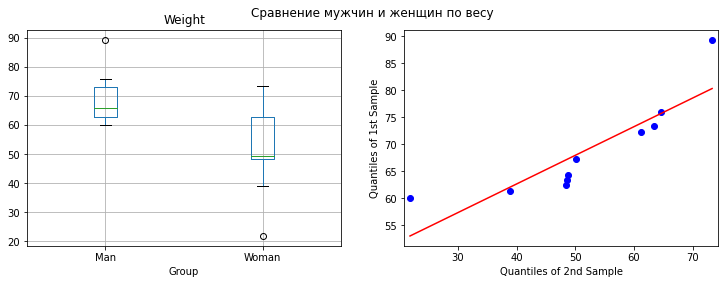

In [13]:
# Boxplot and qqplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4)) 

df_weights.boxplot(column='Weight', by='Group', ax=ax1)
qqplot_2samples(sample_m.values, sample_f.values, line='r', ax=ax2)

plt.suptitle('Сравнение мужчин и женщин по весу')
plt.show()

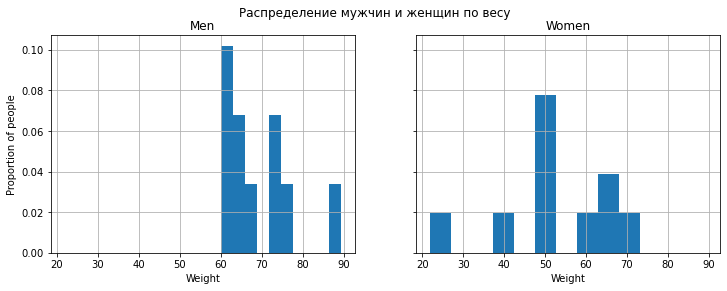

In [14]:
# Гистограммы
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4), sharey=True, sharex=True) 

sample_m.plot.hist(ax=ax1, title = 'Men', density=True)
ax1.set_xlabel("Weight")
ax1.set_ylabel("Proportion of people")
ax1.grid(True)

sample_f.plot.hist(ax=ax2, title = 'Women', density=True)
ax2.set_xlabel("Weight")
ax2.grid(True)

plt.suptitle('Распределение мужчин и женщин по весу')
plt.show()

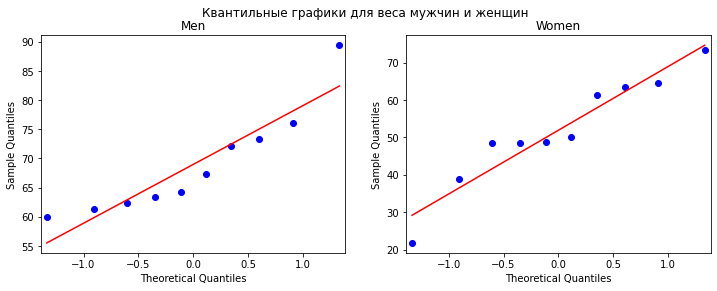

In [48]:
# Квантильный график
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4)) 

qqplot(sample_m.values, line='r', ax=ax1)
ax1.set_title('Men')

qqplot(sample_f.values, line='r', ax=ax2)
ax2.set_title('Women')

plt.suptitle('Квантильные графики для веса мужчин и женщин')
plt.show()

In [18]:
# Посчитаем медиану попарных разностей
print('Медиана попарных разностей между весами мужчин и женщин: {:.2f}'.\
      format(np.median(np.subtract.outer(sample_m.values, sample_f.values))))

Медиана попарных разностей между весами мужчин и женщин: 14.70


<span style="color:blue">
Предварительные вывоы: 
<li>Из приведенных данных и графиков следует, что вес у мужчин и женщин заметно отличается.</li>
<li>Учитывая относительно небольшой объем выборки, по графикам трудно сделать однозначный вывод о 
нормальности распределения.</li>
<li>Используем критерии однородности для независимых выборок.</li>
</span>

**1. Критерий Колмогорова-Смирнова**

In [58]:
# Критерий Колмогорова-Смирнова
stats.ks_2samp(sample_m, sample_f)

KstestResult(statistic=0.6, pvalue=0.05244755244755244)

<span style="color:blue">
Вывод: согласно критерию Колмогорова-Смирнова нулевая гипотеза о равенстве двух непрерывных функций распределения 
не отвергается при уровне значимости 5%. Тем не менее, такой результат нельзя считать значимым из-за небольшого 
объема выборок (нужно, как минимум, 20 наблюдений).
</span>

**2. Критерий Манна-Уитни**

In [20]:
# Критерий Манна-Уитни
stats.mannwhitneyu(sample_m, sample_f, alternative='two-sided')

MannwhitneyuResult(statistic=83.0, pvalue=0.013947279555790499)

<span style="color:blue">
Вывод: согласно критерию Манна-Уитни нулевая гипотеза о равенстве двух функций распределения отвергается 
при уровне значимости 5%.
</span>

**3. Критерий Стьюдента ($t$-тест)**

In [21]:
# Проверка на нормальность с помощью критерия Колмогорова-Смрнова
stats.kstest(sample_m, stats.norm(*stats.norm.fit(sample_m)).cdf)[1], \
stats.kstest(sample_f, stats.norm(*stats.norm.fit(sample_f)).cdf)[1]

(0.7135707403341931, 0.7433777039796527)

In [22]:
# Проверка на нормальность с помощью критерия Шапиро-Уилка
stats.shapiro(sample_m), stats.shapiro(sample_f)

(ShapiroResult(statistic=0.8678708672523499, pvalue=0.09440553188323975),
 ShapiroResult(statistic=0.9407824277877808, pvalue=0.5617526769638062))

In [23]:
# Проверка на нормальность с помощью критерия Харке-Бера
stats.jarque_bera(sample_m), stats.jarque_bera(sample_f)

(Jarque_beraResult(statistic=2.3510592791412637, pvalue=0.30865546024322177),
 Jarque_beraResult(statistic=0.5367327289648527, pvalue=0.7646275973873512))

<span style="color:blue">
Вывод: cудя по графикам и критериям, гипотеза о нормальности не отвергается, хотя нужно учитывать,
что этот результат получен на выборках сравнительно небольшого объема. 
Далее попробуем применить критерий Стьюдента.
</span>

In [56]:
# Критерий Стьюдента
stats.ttest_ind(sample_m, sample_f, equal_var=False)

Ttest_indResult(statistic=3.124146252379086, pvalue=0.006994671118290716)

<span style="color:blue">
Вывод: Критерий Стьюдента отвергает нулевую гипотезу о равенстве МО при условии нормальности выборок. 
</span>

<span style="color:blue">
ИТОГОВЫЙ ВЫВОД: большинство рассмотренных критериев отвергает гипотезу о равенстве распределений и МО,
из чего можно сделать вывод о наличии значимых различий по весу между мужчинами и женщинами.
</span>

### Упражнение 3 (25 баллов).

В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 и 2002 гг. (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?

In [25]:
df_seattle = pd.read_csv('HW2_Data/seattle.txt', sep='\t', header=0, names=['Price', 'Year'])
df_seattle.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [26]:
df_seattle.describe()

,Price,Year
count,100.00000,100.000000
mean,309.09184,2001.500000
std,249.83113,0.502519
min,50.00000,2001.000000
25%,178.60000,2001.000000
50%,248.95000,2001.500000
75%,337.75000,2002.000000
max,1850.00000,2002.000000


In [27]:
sample_2001 = df_seattle[df_seattle['Year']==2001]['Price']
sample_2002 = df_seattle[df_seattle['Year']==2002]['Price']

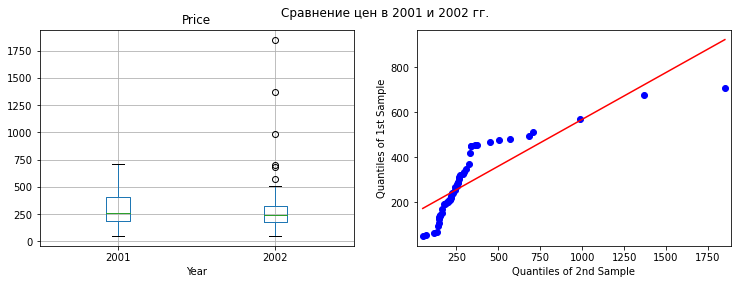

In [28]:
# Boxplot and qqplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4)) 

df_seattle.boxplot(column='Price', by='Year', ax=ax1)
qqplot_2samples(sample_2001.values, sample_2002.values, line='r', ax=ax2)

plt.suptitle('Сравнение цен в 2001 и 2002 гг.')
plt.show()

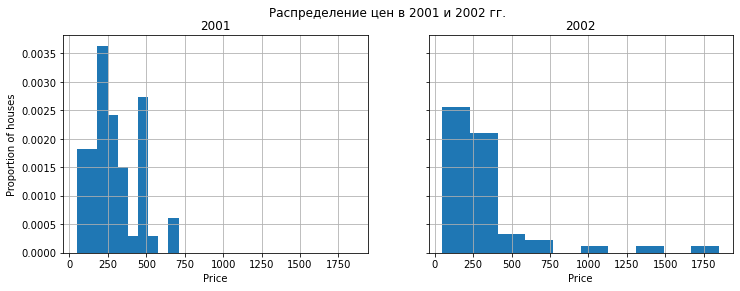

In [29]:
# Гистограммы
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4), sharey=True, sharex=True) 

sample_2001.plot.hist(ax=ax1, title = '2001', density=True)
ax1.set_xlabel("Price")
ax1.set_ylabel("Proportion of houses")
ax1.grid(True)

sample_2002.plot.hist(ax=ax2, title = '2002', density=True)
ax2.set_xlabel("Price")
ax2.grid(True)

plt.suptitle('Распределение цен в 2001 и 2002 гг.')
plt.show()

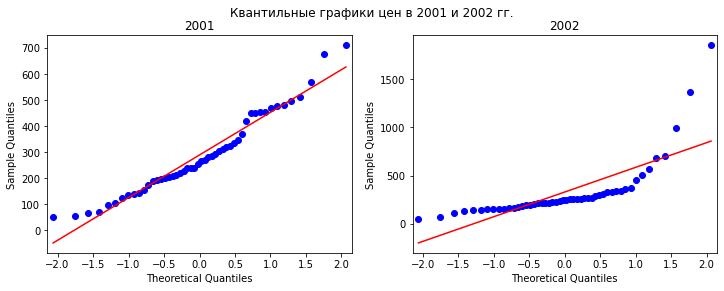

In [30]:
# Квантильные графики
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4)) 

qqplot(sample_2001.values, line='r', ax=ax1)
ax1.set_title('2001')

qqplot(sample_2002.values, line='r', ax=ax2)
ax2.set_title('2002')

plt.suptitle('Квантильные графики цен в 2001 и 2002 гг.')
plt.show()

In [31]:
# Посчитаем медиану попарных разностей
print('Медиана попарных разностей между ценами в 2001 и 2002 гг.: {:.2f}'.\
      format(np.median(np.subtract.outer(sample_2001.values, sample_2002.values))))

Медиана попарных разностей между ценами в 2001 и 2002 гг.: 8.15


<span style="color:blue">
Предварительные выводы: 
<li>Из приведенных данных и графиков следует, что цены в 2001 и 2002 гг. в среднем мало отличаются.</li>
<li>Распределения далеки от нормального, причем в данном случае мы имеем выборки достаточно большого объема.</li>
<li>Будем использовать критерии однородности для независимых выборок, за исключением критерия Стьюдента, 
который требует нормальности распределений.</li>
</span>

**1. Критерий Колмогорова-Смирнова**

In [32]:
stats.ks_2samp(sample_2001, sample_2002)

KstestResult(statistic=0.14, pvalue=0.7166468440414822)

<span style="color:blue">
Вывод: согласно критерию Колмогорова-Смирнова нулевая гипотеза о равенстве двух непрерывных функций распределения 
не отвергается.
</span>

**2. Критерий Манна-Уитни**

In [33]:
stats.mannwhitneyu(sample_2001, sample_2002, alternative='two-sided')

MannwhitneyuResult(statistic=1295.5, pvalue=0.7563872675701748)

<span style="color:blue">
Вывод: согласно критерию Манна-Уитни нулевая гипотеза о равенстве двух функций распределения не отвергается.
</span>

<span style="color:blue">
ИТОГОВЫЙ ВЫВОД: из приведенных критериев следует, что в среднем цены за год не изменились.
</span>

### Упражнение 4 (25 баллов).

В рамках исследования эффективности препарата метилфенидат пациенты с синдромом дефицита внимания и гиперактивности 
в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходил тест на способность 
к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса 
каждый испытуемый проходил второй тест. Был ли эффект от применения препарата? Данные находятся в файле methylphenidate.txt.

In [34]:
df_methyl = pd.read_csv('HW2_Data/methylphenidate.txt', sep=' ', header=0, names=['Placebo', 'Methylphenidate'])
df_methyl.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [35]:
df_methyl.describe()

,Placebo,Methylphenidate
count,24.000000,24.000000
mean,39.750000,44.708333
std,11.314669,12.319935
min,26.000000,29.000000
25%,33.000000,35.000000
50%,36.000000,42.500000
75%,44.500000,52.500000
max,71.000000,77.000000


In [36]:
sample_plac = df_methyl['Placebo']
sample_methyl = df_methyl['Methylphenidate']
sample_pm_diff = sample_plac - sample_methyl

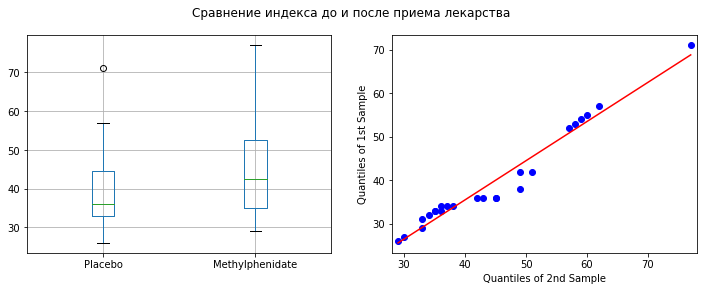

In [37]:
# Boxplot and qqplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4)) 

df_methyl.boxplot(ax=ax1)
qqplot_2samples(sample_plac, sample_methyl, line='r', ax=ax2)

plt.suptitle('Сравнение индекса до и после приема лекарства')
plt.show()

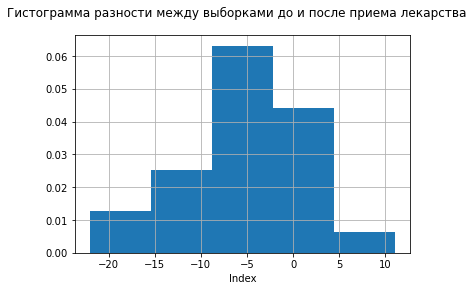

In [66]:
# Гистограммы
fig, ax = plt.subplots(ncols=1, figsize=(6,4)) 

plt.hist(sample_pm_diff, bins=5, density=True)
ax.set_xlabel("Index")
ax.set_ylabel("Proportion of people")
ax.grid(True)

plt.suptitle('Гистограмма разности между выборками до и после приема лекарства')
plt.show()

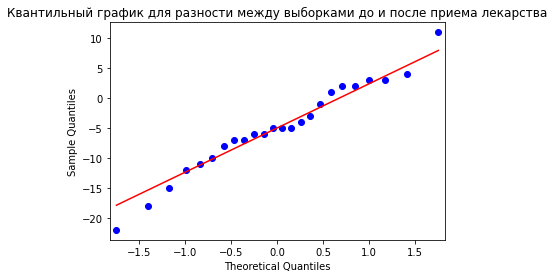

In [39]:
# Квантильный график
ax = plt.subplot()
plt.title('Квантильный график для разности между выборками до и после приема лекарства')
qqplot(sample_pm_diff, line='s', ax=ax)
plt.show()

In [40]:
print('Медиана разности наблюдений до и после приема лекарства: {:.0f}'.format(np.median(sample_pm_diff)))

Медиана разности наблюдений до и после приема лекарства: -5


<span style="color:blue">
Предварительные выводы: 
<li>Из приведенных данных и графиков следует, что индекс после приема лекарства заметно вырос, 
т.е. лекарство может быть эффективным.</li>
<li>Распределение разности между выборками внешне близко к нормальному.</li>
<li>Будем использовать критерии однородности для зависимых выборок.</li>
</span>

**1. Критерий знаков**

In [41]:
# Критерий знаков
sign_test(sample_pm_diff)

(-5.0, 0.06391465663909912)

<span style="color:blue">
Вывод: двусторонний критерий знаков не отвергает нулевую гипотезу о равенстве нулю параметра сдвига.
</span>

**2. Критерий знаковых рангов Уилкоксона**

In [61]:
# Критерий знаковых рангов Уилкоксона
# The one-sided test has the null hypothesis that the median is negative against the alternative that it is positive
stats.wilcoxon(sample_plac, sample_methyl, alternative='greater')

WilcoxonResult(statistic=48.5, pvalue=0.9988771080970764)

<span style="color:blue">
Вывод: односторонний критерий знаковых рангов Уилкоксона не отвергает нулевую гипотезу об отрицательности параметра сдвига 
до и после приема лекарства при условии симметричности распределения остатков.
</span>

**3. Критерий Стьюдента ($t$-тест)**

In [43]:
# Проверка на нормальность с помощью критериев Шапиро-Уилка и Харке-Бера
stats.shapiro(sample_pm_diff), stats.jarque_bera(sample_pm_diff)

(ShapiroResult(statistic=0.9798052906990051, pvalue=0.8922504186630249),
 Jarque_beraResult(statistic=0.20405627787855618, pvalue=0.9030041417326621))

In [44]:
# Проверка на нормальность с помощью критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера
pvalues = [stats.kstest(sample_pm_diff, stats.norm(*stats.norm.fit(sample_pm_diff)).cdf)[1],
            stats.shapiro(sample_pm_diff)[1],
            stats.jarque_bera(sample_pm_diff)[1]]

print('P-values для критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера:\n')
print(pvalues)

P-values для критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера:

[0.9530764298191562, 0.8922504186630249, 0.9030041417326621]


<span style="color:blue">
Вывод: приведенные выше критерии не отвергают гипотезу о нормальности, хотя нужно помнить о сравнительно небольшом объеме
выборки. Далее применим критерий Стьюдента.
</span>

In [45]:
# Критерий Стьюдента
stats.ttest_rel(sample_plac, sample_methyl)

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

<span style="color:blue">
Вывод: двусторонний критерий Стьюдента отвергает нулевую гипотезу о равенстве нулю параметра сдвига при уровне значимости 5% и 
при условии нормальности распределения. 
</span>

<span style="color:blue">
ИТОГОВЫЙ ВЫВОД: в целом, большинство критериев при тех или иных условиях отвергают гипотезу о нулевом значении параметра сдвига.
Кроме того, один из них - односторонний критерий знаковых рангов Уилкоксона - не отвергает гипотезу об увеличении индекса 
после применения лекарства. Таким образом, данный препарат можно считать эффективным с достаточным уровнем значимости.
</span>